
<h3> Members:</h3>
1>Baren Das <br/>
Reg No: 2022AA05279<br/>
2>Rudraneel Das <br/>
Reg No: 2022AA05437<br/>
3>Sudipto Das<br/>
Reg No: 2022AA05279<br/>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import feature_selection
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
%matplotlib inline

In [2]:

# DATA_URL ='https://archive.ics.uci.edu/ml/machine-learning-databases/00291/df_airfoil_self_noise.dat'
# #Defining column Names
# #col = ['Frequency', 'alpha', 'Chord_Lenght', 'U_Infinity', 'delta', 'SSPL']
# col =["Frequency", "Angle of attack", "chord length", "Free stream velocity", "Sunction side", "pressure level"]

In [3]:
df_model_info = pd.DataFrame(columns=['Type','Model_Object','mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'acc'])

def mod_df():
    global df_model_info
    df_model_info = pd.DataFrame(columns=['Type','Model_Object','mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'acc'])
    return


In [4]:
# def downloadData( data_url, lst_col_names, DATA_STAT=True):
#     """This method helps in reading and downloading the data from URL 
#     The data files must be text or similar.
#     The seperaator to be specified
    

#     Args:
#         data_url (String): URL OR PATH
#         lst_col_names (List): list of Column names
#         DATA_STAT (Boolean): for printing dataset stats

#     Returns:
#         _type_: _description_
#     """
#     df_data = pd.read_table(DATA_URL,names=col)
    
#     #pringting dataset stats
#     if DATA_STAT== True:
#         print ("\nDataset Length: ", len(df_data))
#         print ("\nDataset Shape: ", df_data.shape)
        
        
#         print ("\nDataset: \n\n",df_data.head(2))

    
    
#     return df_data


In [5]:
# df_data = downloadData(DATA_URL,col,DATA_STAT=True)

In [6]:
df_data = pd.read_csv(r"D:\After_war\Tutorial\Scalar docs\project\ml_bits\airfoil_self_noise.dat", sep="\t", header=None)

In [7]:
df_data.columns=["Frequency", "Angle of attack", "chord length", "Free stream velocity", "Sunction side", "pressure level"]


 Missing value count for the data set:

 Frequency               0
Angle of attack         0
chord length            0
Free stream velocity    0
Sunction side           0
pressure level          0
dtype: int64


<AxesSubplot:>

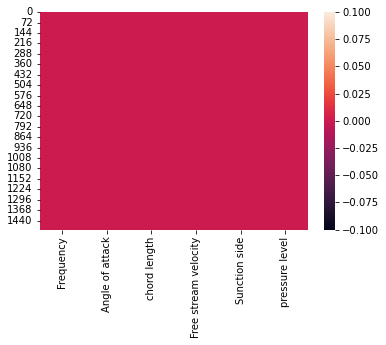

In [8]:
print("\n Missing value count for the data set:\n\n", df_data.isnull().sum())
sns.heatmap(df_data.isna())

In [9]:
print(df_data.describe().T)

                       count         mean          std         min  \
Frequency             1503.0  2886.380572  3152.573137  200.000000   
Angle of attack       1503.0     6.782302     5.918128    0.000000   
chord length          1503.0     0.136548     0.093541    0.025400   
Free stream velocity  1503.0    50.860745    15.572784   31.700000   
Sunction side         1503.0     0.011140     0.013150    0.000401   
pressure level        1503.0   124.835943     6.898657  103.380000   

                             25%          50%          75%           max  
Frequency             800.000000  1600.000000  4000.000000  20000.000000  
Angle of attack         2.000000     5.400000     9.900000     22.200000  
chord length            0.050800     0.101600     0.228600      0.304800  
Free stream velocity   39.600000    39.600000    71.300000     71.300000  
Sunction side           0.002535     0.004957     0.015576      0.058411  
pressure level        120.191000   125.721000   129.995500 

In [10]:
df_data.shape

(1503, 6)

<h5>Boxplot for outlier detection </h5>

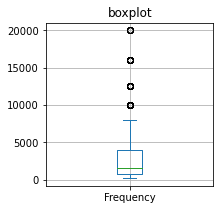

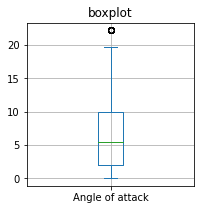

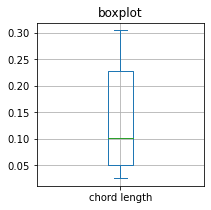

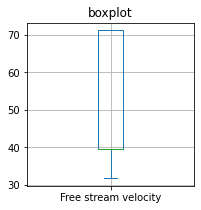

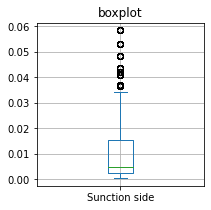

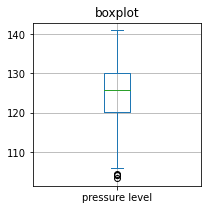

In [11]:

# Boxplot for outlier detection  
def print_boxplot(col):
    fig = plt.figure(figsize =(3,3))
# ax = fig.add_axes([0, 0, 1, 1])
    ax = df_data[col].plot(kind='box',title='boxplot')
#     plt.ylabel(col)
    plt.grid()
    
for item in df_data.columns:
    print_boxplot(item)

<h3>Removing the outliers</h3>

In [12]:
# REMOVE OUTLIERS 
def outlier_remover(data):
    for col in data.columns:
        if data.dtypes[col] !=  'object':
            Q1 = np.percentile(data[col], 25, interpolation = 'midpoint')
            # Third quartile (Q3)
            Q3 = np.percentile(data[col], 75, interpolation = 'midpoint')
            iqr = Q3-Q1
            lower_limit = Q1 - 1.5*iqr
            upper_limit = Q3 + 1.5*iqr
            data=data[(data[col]>lower_limit) & (data[col]<upper_limit)]
    return data

In [13]:
# Cleaned data 
df_airfoil = outlier_remover(df_data)

C:\Users\SUDIPTO DAS\AppData\Local\Temp\ipykernel_31740\2033578048.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data[col], 25, interpolation = 'midpoint')
C:\Users\SUDIPTO DAS\AppData\Local\Temp\ipykernel_31740\2033578048.py:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data[col], 75, interpolation = 'midpoint')


<h5>Checking if the data follows Gaussian distribution usiing Q-Q plot:<br/>
Here we have tried various transformations to check which best converts 
the given data into Gaussian form.</h5> 

In [14]:
def plot_custom(data_original , data_transformed, label , item):
    plt.figure(figsize=(15,6))
    # plt.title(title)
    plt.subplot(1, 2, 1)
    stats.probplot(data_original, dist="norm", plot=plt)
    plt.xlabel('original_plot : '+item)
    plt.subplot(1, 2, 2)
    stats.probplot(data_transformed, dist="norm", plot=plt)
    plt.xlabel(label)
    plt.show()

<h5>1>log-normal transformation</h5>

log-normal transformation


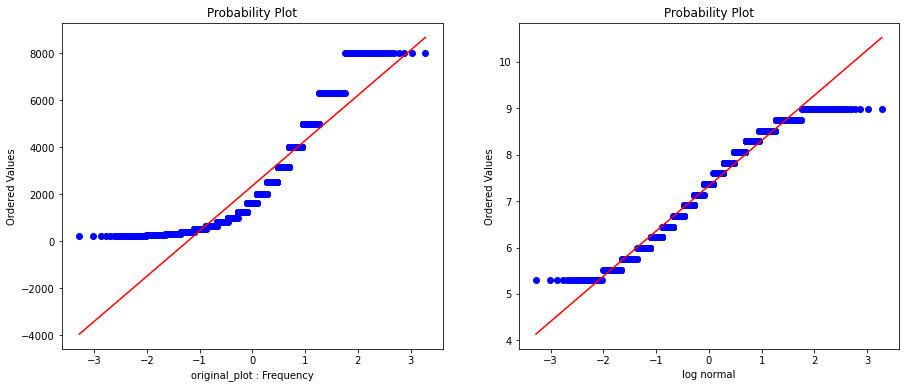

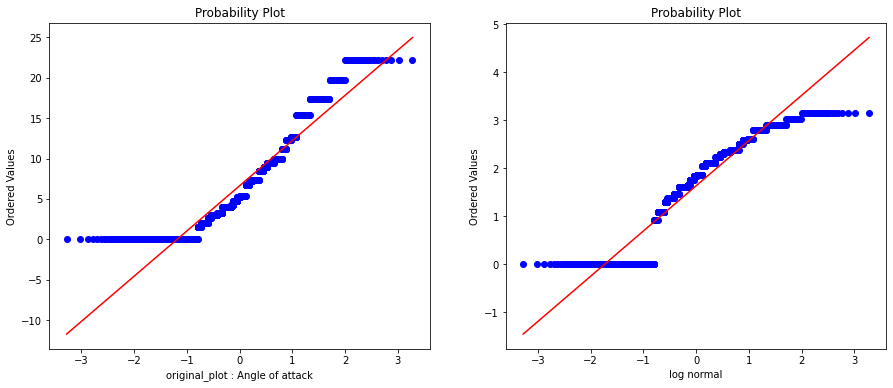

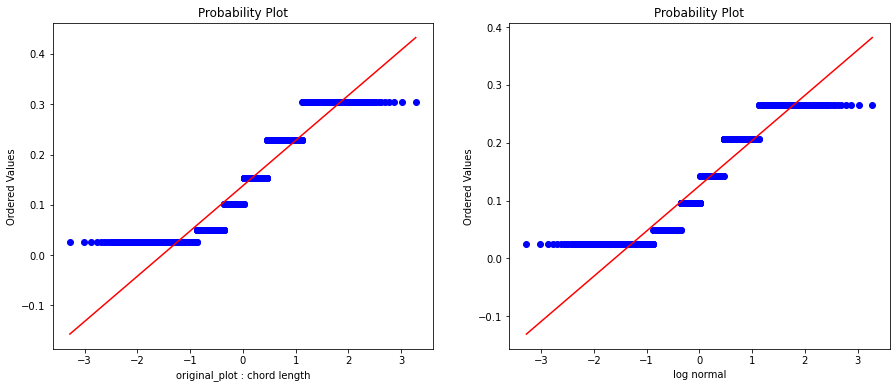

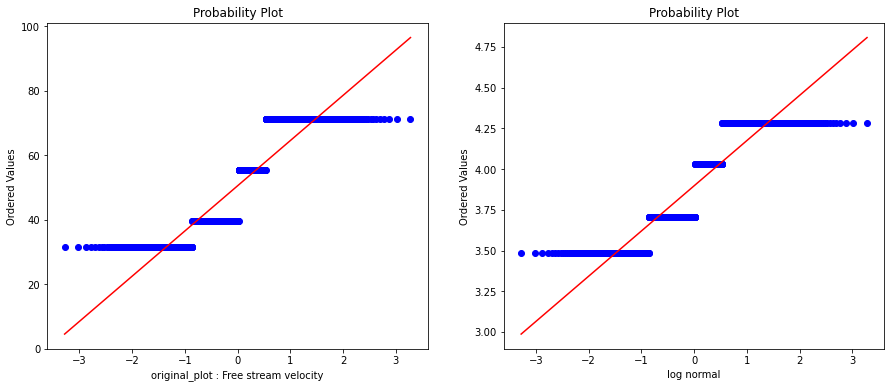

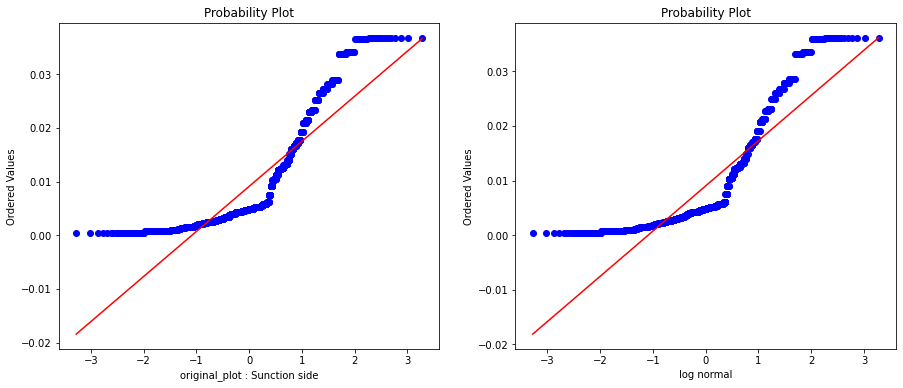

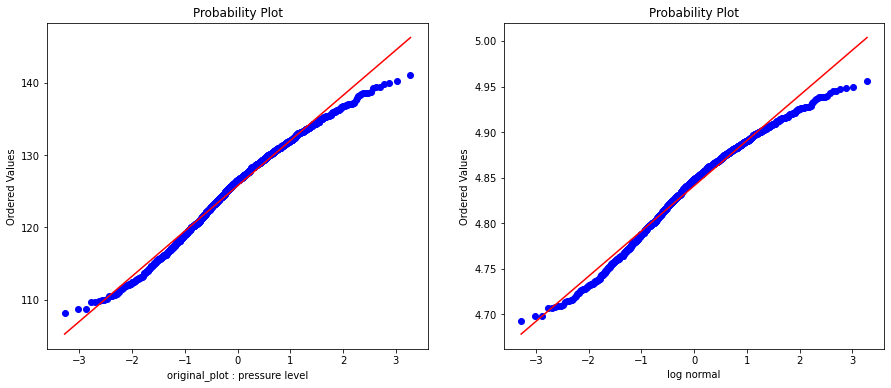

In [15]:
print("log-normal transformation")
# log-normal transformation 
for item in df_airfoil.columns:
    log_smoker = np.log(df_airfoil[item]+1)
    plot_custom(df_airfoil[item],log_smoker,"log normal",item)

<h5>2.Reciprocal Transformation</h5>

reciprocal transformation


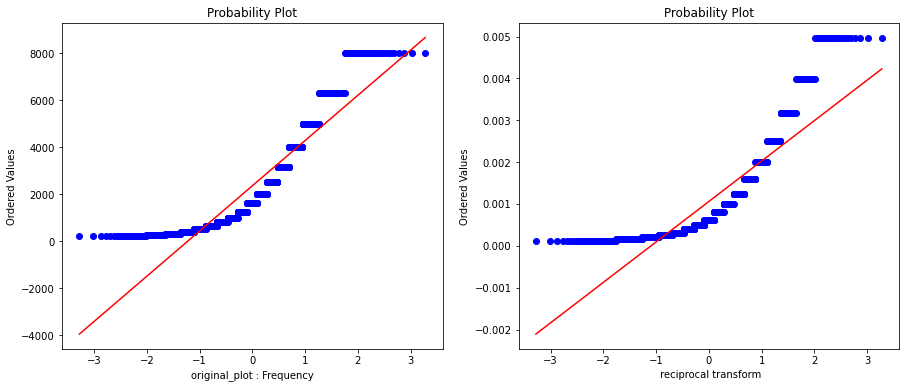

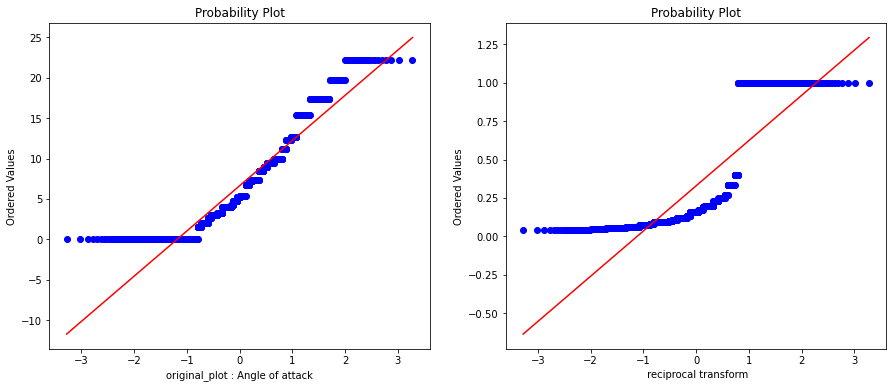

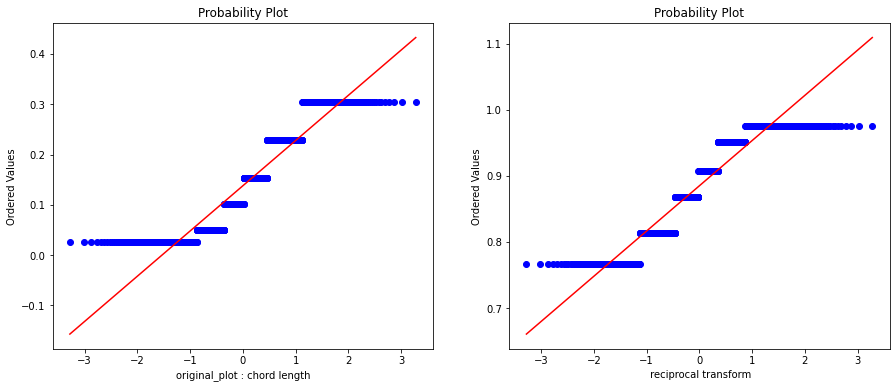

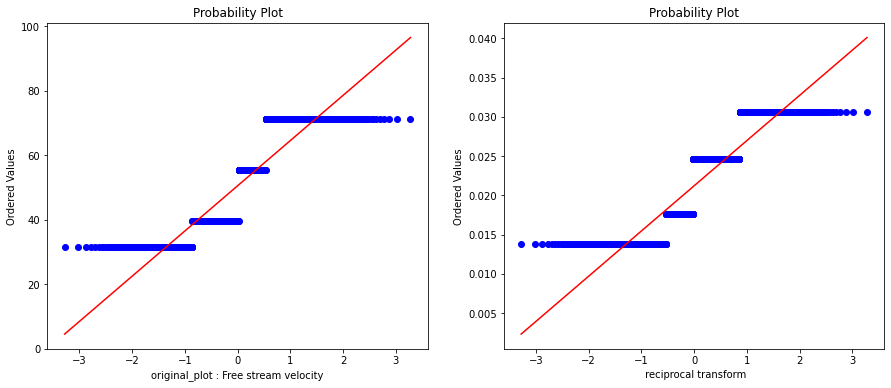

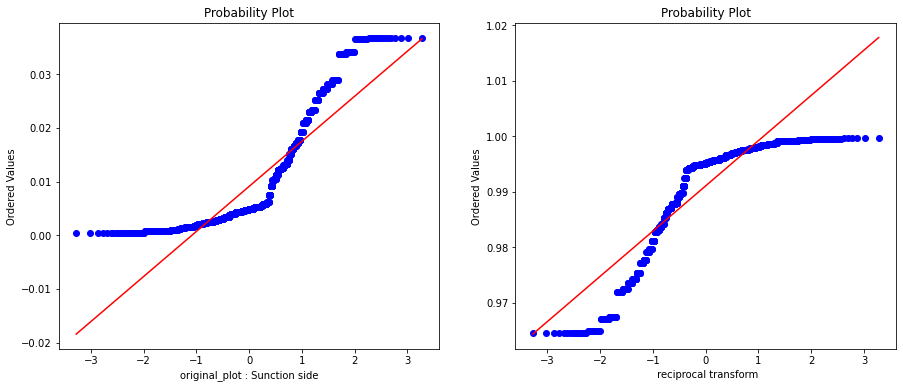

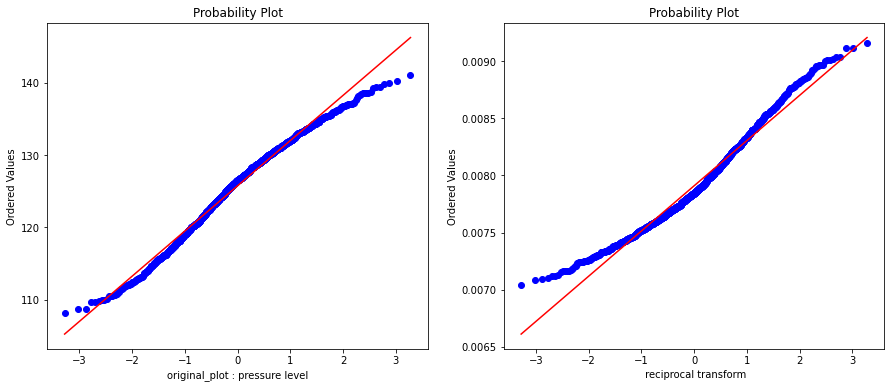

In [16]:
print("reciprocal transformation")
for item in df_airfoil.columns:
    rec_smoker = 1/(df_airfoil[item]+1)
    plot_custom(df_airfoil[item],rec_smoker," reciprocal transform", item)

<h5>3.square-root transformation</h5>

square-root transformation


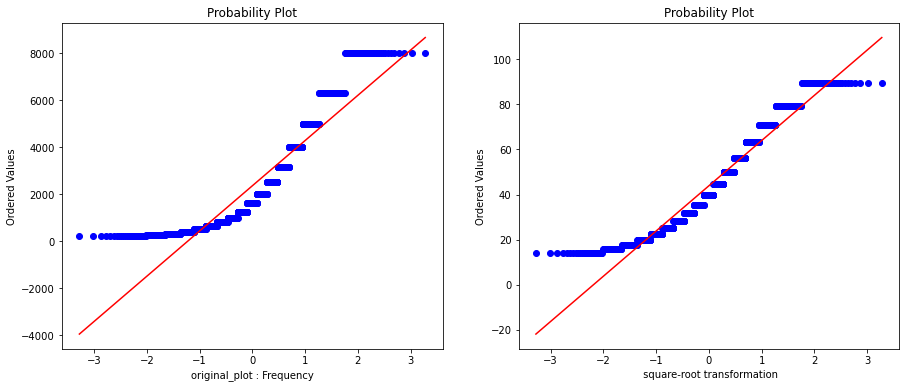

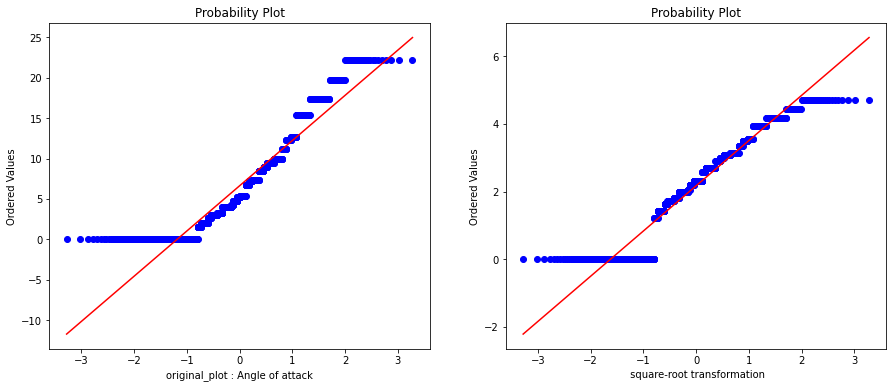

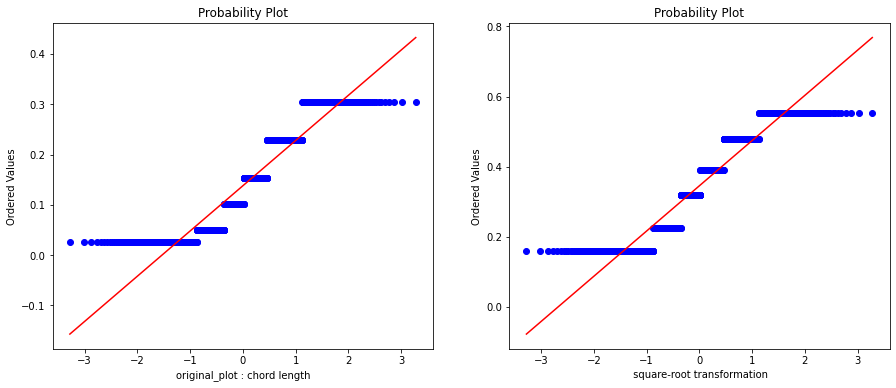

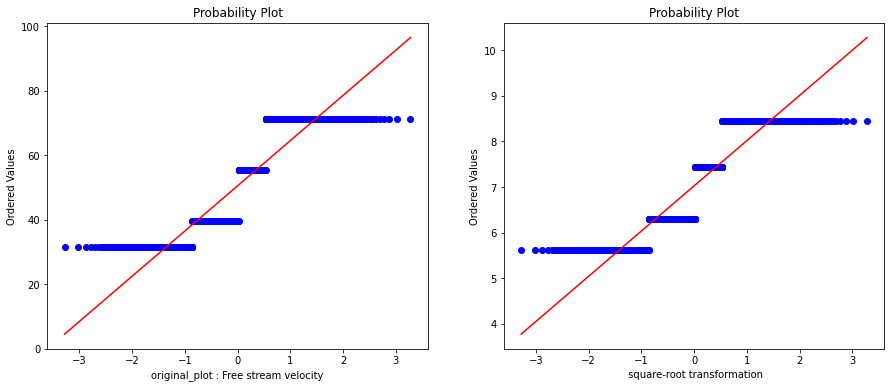

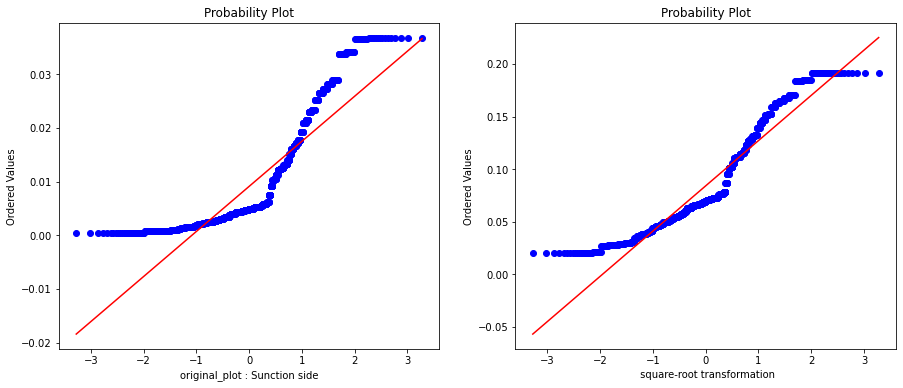

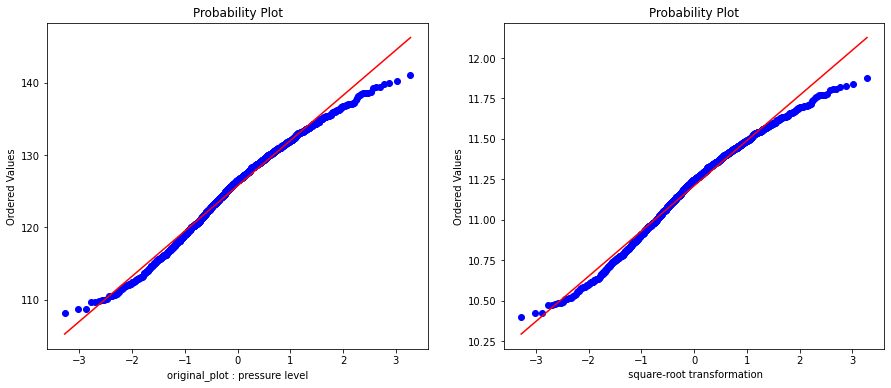

In [17]:
# square-root transformation 
print("square-root transformation")
for item in df_airfoil.columns:
    sq_root_transform = df_airfoil[item]**(1/2)
    plot_custom(df_airfoil[item],sq_root_transform," square-root transformation", item)

<h5>4.Exponential Tanformation :</h5>

Exponential Tanformation


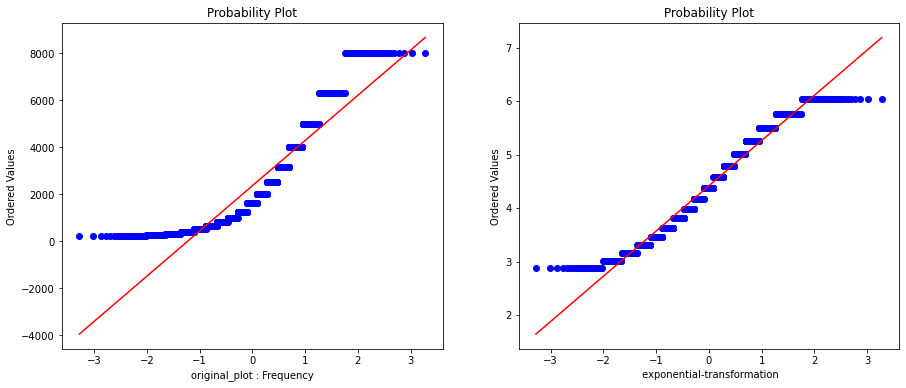

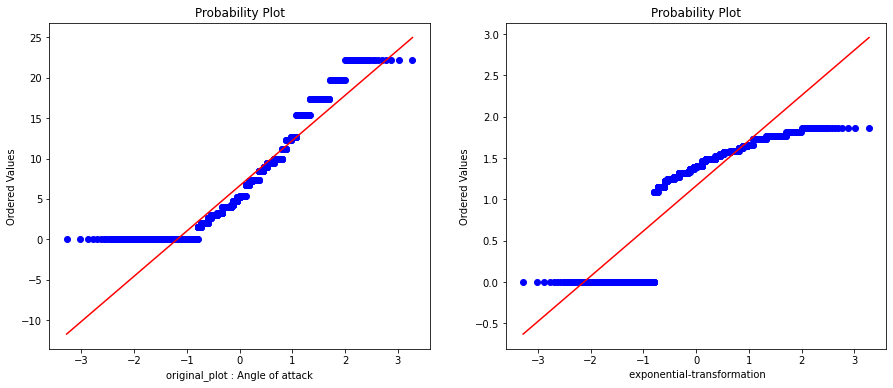

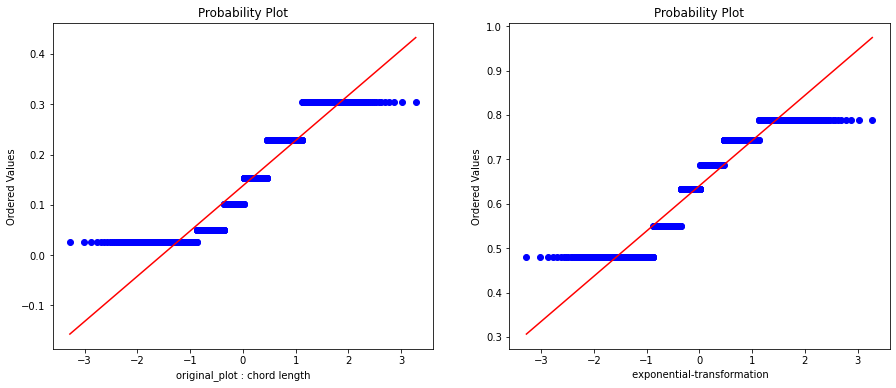

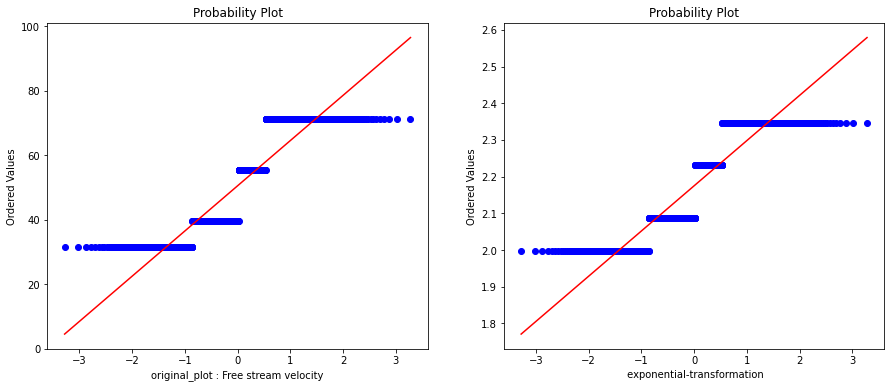

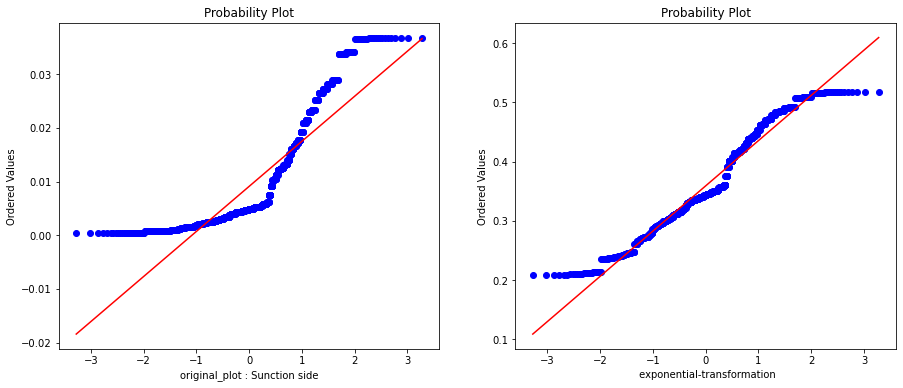

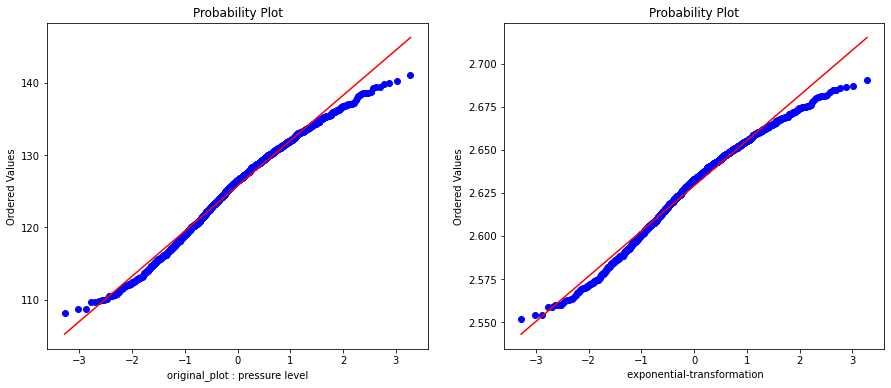

In [18]:
# Exponential Tanformation
print("Exponential Tanformation")
for item in df_airfoil.columns:
    exp_transform = df_airfoil[item]**(1/5)
    plot_custom(df_airfoil[item],exp_transform," exponential-transformation", item)

Looking at all these graphs we observerd that log transformation gives us the best results and hence would be using the same for model building

<h5> Here we have cosolidated all possible insights that could be useful</h5>

In [19]:
ProfileReport(df_airfoil)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Basis the above plots we can say that the data would need normalization which would help in getting better prediction.

Since this is a regression problem, we have not done any classification, having said that skewness in data have been treated with scaling/ transformation to avoid such issues

This can be also be avoided by useing some sampling techniques and one of such would be SMOTE

#---Since all the data are numerical data points using correletion metrics to visualize the correletaion values ans considering P a 'Y'

The corelation values not showing significant  with -0.39 between Frequency to SSPL being highiest. Hence would use VIF to select the set of features.
The metrix also shows that alpha and beta are highly co-related and hence it would lead to multi co-linearity issue

In [20]:
##-------Calculating VIF

def VIF_Calc(df,Y_col_name):
    """This method calculates and return the VIF information for identifying multi colinearity

    Args:
        df (Dataframe): Input Data frame
        Y_col_name (String): Lable/ Y column name

    Returns:
        Pnadas Dataframe: Dataframe contains the VIF values for all featres
    """
    Y = Y_col_name
    
    df_input = df.copy()
    X = df_input.drop(Y, axis=1)

    df_vif = pd.DataFrame()
    df_vif["feature"] = X.columns
    df_vif["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
    print(df_vif)
    return df_vif


df_VIF_out = VIF_Calc(df_data,'pressure level')

                feature       VIF
0             Frequency  1.942627
1       Angle of attack  6.557489
2          chord length  3.254447
3  Free stream velocity  7.148723
4         Sunction side  4.299617


With the VIF Scores we can see that there can be concen of multi colinearity between U_Infinity and alpha. However we can take a iterative approach here with or without these features basis model performance. We would start with everything

Since the range of each features varies hence applying a tranformation on the input data set

In [21]:
def data_log_transformation(df_X):
    """_summary_

    Args:
        df_X (Pandas Dataframe object): Dataframe for all input features

    Returns:
        Pandas Dataframe object: Transformed dataframe
    """
    df_input = df_X.copy()
    obj_transformer = FunctionTransformer(func=np.log1p)
    
    df_transformed = obj_transformer.fit_transform(df_input)
    
    return df_transformed

In [22]:
def inverse_log_transformation(input):
    return np.exp(input)-1

In [23]:
df_transformed =data_log_transformation(df_airfoil)

df_transformed.head()

df_features = df_transformed[["Frequency", "Angle of attack", "chord length", "Free stream velocity", "Sunction side"]]

df_target = df_transformed['pressure level']

Defining Metrics

In [24]:
def mean_absolute_percent_error(y_test, ypred):
    mape = np.mean(np.abs((y_test - ypred) / y_test))
    return mape

def accuracy(mape):
    return (1-mape)*100

In [25]:
def fill_model_info(mod_type,mdl, mse, mae, mape, acc):
    """This function collectes the best models for final selection

    Args:
        mod_type (String): Base/ Optimized
        mod_name (String): Name of the Model
        mdl (Model Object): Model
        mse (float): mean_squared_error
        mae (float): mean_absolute_error
        mape (float): mean_absolute_percentage_error
        accuracy (float): Accuracy

    Returns:
        Pandas Dataframe: collection of best models
    """
    dict_model_info = dict()
    
    dict_model_info = {
            'Type':mod_type,
            'Model_Object': mdl,
            'mean_squared_error':mse,
            'mean_absolute_error':mae,
            'mean_absolute_percentage_error': mape,
            'Accuracy': acc
            
            
        }

    #df_model_info.append(dict_model_info, ignore_index=True, sort=False)
    global df_model_info
    df_model_info = df_model_info.append(dict_model_info, ignore_index=True, verify_integrity=False, sort=None)
    
    return

In [26]:
def build_base_model(X_train, y_train, X_test, y_test):
    """This method is to build base model

    Args:
        X_train (np.appray): Features set for training
        y_train (np.appray): Target variable for training
        X_test (np.appray): Features set for testing
        y_test (np.appray): Target variable for testing

    Returns:
        model object: Linear Regression model object
    """
    base_model = LinearRegression()
    base_model.fit(X_train, y_train)
    yhat = base_model.predict(X_test)

    mape = mean_absolute_percent_error(inverse_log_transformation(y_test), inverse_log_transformation(yhat))
    mse = mean_squared_error(inverse_log_transformation(y_test), inverse_log_transformation(yhat))
    mae = mean_absolute_error(inverse_log_transformation(y_test), inverse_log_transformation(yhat))
    acc = accuracy(mape)

    print('mean_squared_error : ', mse)
    print('mean_absolute_error : ', mae)
    print('mean_absolute_percentage_error : ', mape*100)
    print('Accuracy of the Model is : ', acc)
    
    #------ anding to model dict
    fill_model_info('Base', base_model, mse, mae, mape, acc)
    
    
    return base_model

In [27]:
# list of alpha to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}


In [28]:
def search_best_model(X_train, Y_train, X_test, Y_test,params,n_splits = 10):
    
    lst_type = [1,2,3]
    print(lst_type)
    for type in lst_type:
        #type = ''
        # creating a KFold object with 5 splits
        
        if type==1:
            lm = Ridge()
        elif type==2:
            
            lm = Lasso()
        elif type==3:
            lm = ElasticNet()
        
      
        folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

        # specify range of hyperparameters
        hyper_params = [{'n_features_to_select': list(range(2, 6))}]
        #lm = globals()["type"]
        lm.fit(X_train, Y_train)
        rfe = RFE(lm)
        
        # set up GridSearchCV()
        model_cv = GridSearchCV(estimator = rfe, 
                                param_grid = hyper_params, 
                                scoring= 'neg_mean_absolute_error', 
                                cv = folds, 
                                verbose = 1,
                                return_train_score=True)      


        # fit the model
        model_cv.fit(X_train, Y_train)
        cv_results = pd.DataFrame(model_cv.cv_results_)
        
        # plotting cv results
        print('The optimal features with {} is {} \n\n'.format(lm, cv_results.param_n_features_to_select.max()))
        print('The best estimator for the model is: \n\n',model_cv.best_estimator_)
        plt.figure(figsize=(3,3))

        plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
        plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
        plt.xlabel('number of features')
        plt.ylabel('neg_mean_absolute_error')
        plt.title("Optimal Number of Features")
        plt.legend(['test score', 'train score'], loc='upper left')
        plt.show()
        
        
        #n_features_optimal = cv_results.param_n_features_to_select.max()
        #lm = LinearRegression()
        lm.fit(X_train, Y_train)
     
        rfe = RFE(lm, n_features_to_select=cv_results.param_n_features_to_select.max())             
        rfe = rfe.fit(X_train, Y_train)
        yhat = lm.predict(X_test)
        mape = mean_absolute_percentage_error(inverse_log_transformation(Y_test),inverse_log_transformation(yhat))
        mse = mean_squared_error(inverse_log_transformation(Y_test), inverse_log_transformation(yhat))
        mae= mean_absolute_error(inverse_log_transformation(Y_test), inverse_log_transformation(yhat))
        acc = accuracy(mape)
        fill_model_info('Optimized',lm,mse,mae,mape,acc)
        
        print('mean_squared_error : ', mse)
        print('mean_absolute_error : ', mae)
        print('mean_absolute_percentage_error : ', mape)
        print('Accuracy of the Model is : ',acc)
        print('\n\n')
    
    return

Case 1: Train = 80 % Test = 20% [ x_train1, y_train1] = 80%; [ x_test1, y_test1] = 20%;

Case 1 Base model


mean_squared_error :  25.761311916758416
mean_absolute_error :  4.039506640576043
mean_absolute_percentage_error :  3.2259730772379243
Accuracy of the Model is :  96.77402692276208


C:\Users\SUDIPTO DAS\AppData\Local\Temp\ipykernel_31740\1907801009.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_info = df_model_info.append(dict_model_info, ignore_index=True, verify_integrity=False, sort=None)
C:\Users\SUDIPTO DAS\AppData\Local\Temp\ipykernel_31740\1907801009.py:31: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df_model_info = df_model_info.append(dict_model_info, ignore_index=True, verify_integrity=False, sort=None)


C1_bs_model is :  LinearRegression()



[1, 2, 3]
Fitting 10 folds for each of 4 candidates, totalling 40 fits
The optimal features with Ridge() is 5 


The best estimator for the model is: 

 RFE(estimator=Ridge(), n_features_to_select=5)


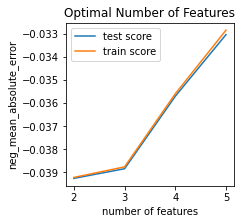

C:\Users\SUDIPTO DAS\AppData\Local\Temp\ipykernel_31740\1907801009.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_info = df_model_info.append(dict_model_info, ignore_index=True, verify_integrity=False, sort=None)
C:\Users\SUDIPTO DAS\AppData\Local\Temp\ipykernel_31740\1907801009.py:31: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df_model_info = df_model_info.append(dict_model_info, ignore_index=True, verify_integrity=False, sort=None)


mean_squared_error :  27.282366442300823
mean_absolute_error :  4.148936351021339
mean_absolute_percentage_error :  0.033181771544463036
Accuracy of the Model is :  96.6818228455537



Fitting 10 folds for each of 4 candidates, totalling 40 fits
The optimal features with Lasso() is 5 


The best estimator for the model is: 

 RFE(estimator=Lasso(), n_features_to_select=2)


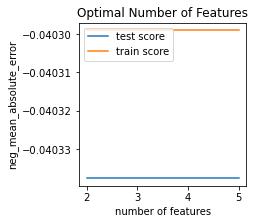

C:\Users\SUDIPTO DAS\AppData\Local\Temp\ipykernel_31740\1907801009.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_info = df_model_info.append(dict_model_info, ignore_index=True, verify_integrity=False, sort=None)
C:\Users\SUDIPTO DAS\AppData\Local\Temp\ipykernel_31740\1907801009.py:31: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df_model_info = df_model_info.append(dict_model_info, ignore_index=True, verify_integrity=False, sort=None)


mean_squared_error :  41.83290205821422
mean_absolute_error :  5.324125349297054
mean_absolute_percentage_error :  0.04290189371422062
Accuracy of the Model is :  95.70981062857794



Fitting 10 folds for each of 4 candidates, totalling 40 fits
The optimal features with ElasticNet() is 5 


The best estimator for the model is: 

 RFE(estimator=ElasticNet(), n_features_to_select=2)


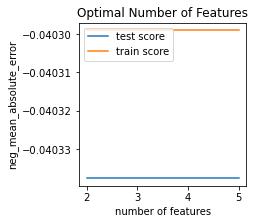

mean_squared_error :  41.83290205821422
mean_absolute_error :  5.324125349297054
mean_absolute_percentage_error :  0.04290189371422062
Accuracy of the Model is :  95.70981062857794



        Type        Model_Object mean_squared_error mean_absolute_error  \
0       Base  LinearRegression()          25.761312            4.039507   
1  Optimized             Ridge()          27.282366            4.148936   
2  Optimized             Lasso()          41.832902            5.324125   
3  Optimized        ElasticNet()          41.832902            5.324125   

  mean_absolute_percentage_error  acc   Accuracy  
0                        0.03226  NaN  96.774027  
1                       0.033182  NaN  96.681823  
2                       0.042902  NaN  95.709811  
3                       0.042902  NaN  95.709811  


C:\Users\SUDIPTO DAS\AppData\Local\Temp\ipykernel_31740\1907801009.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_info = df_model_info.append(dict_model_info, ignore_index=True, verify_integrity=False, sort=None)
C:\Users\SUDIPTO DAS\AppData\Local\Temp\ipykernel_31740\1907801009.py:31: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df_model_info = df_model_info.append(dict_model_info, ignore_index=True, verify_integrity=False, sort=None)


In [29]:


C1_X_train,C1_X_test,C1_y_train,C1_y_test = train_test_split(df_features,
                                                 df_target,
                                                 test_size=0.2,
                                                 random_state=100
)



print('Case 1 Base model\n\n')
C1_bs_model = build_base_model(C1_X_train, C1_y_train, C1_X_test, C1_y_test)
print('C1_bs_model is : ', C1_bs_model)

print('\n\n')

search_best_model(C1_X_train, C1_y_train,C1_X_test,C1_y_test, params)

print(df_model_info)

Case 2: Train = 10 % Test = 90% [ x_train2, y_train2] = 10%; [ x_test2, y_test2] = 90%

C:\Users\SUDIPTO DAS\AppData\Local\Temp\ipykernel_31740\1907801009.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_info = df_model_info.append(dict_model_info, ignore_index=True, verify_integrity=False, sort=None)
C:\Users\SUDIPTO DAS\AppData\Local\Temp\ipykernel_31740\1907801009.py:31: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df_model_info = df_model_info.append(dict_model_info, ignore_index=True, verify_integrity=False, sort=None)


Case 2 Base model


mean_squared_error :  27.194717301464333
mean_absolute_error :  3.9780595806402586
mean_absolute_percentage_error :  3.166142277868125
Accuracy of the Model is :  96.83385772213188
C2_bs_model is :  LinearRegression()
[1, 2, 3]
Fitting 10 folds for each of 4 candidates, totalling 40 fits
The optimal features with Ridge() is 5 


The best estimator for the model is: 

 RFE(estimator=Ridge(), n_features_to_select=5)


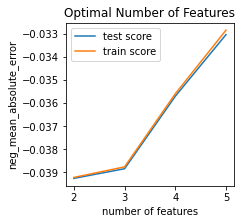

C:\Users\SUDIPTO DAS\AppData\Local\Temp\ipykernel_31740\1907801009.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_info = df_model_info.append(dict_model_info, ignore_index=True, verify_integrity=False, sort=None)
C:\Users\SUDIPTO DAS\AppData\Local\Temp\ipykernel_31740\1907801009.py:31: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df_model_info = df_model_info.append(dict_model_info, ignore_index=True, verify_integrity=False, sort=None)


mean_squared_error :  27.282366442300823
mean_absolute_error :  4.148936351021339
mean_absolute_percentage_error :  0.033181771544463036
Accuracy of the Model is :  96.6818228455537



Fitting 10 folds for each of 4 candidates, totalling 40 fits
The optimal features with Lasso() is 5 


The best estimator for the model is: 

 RFE(estimator=Lasso(), n_features_to_select=2)


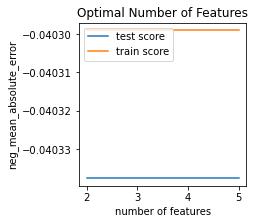

C:\Users\SUDIPTO DAS\AppData\Local\Temp\ipykernel_31740\1907801009.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_info = df_model_info.append(dict_model_info, ignore_index=True, verify_integrity=False, sort=None)
C:\Users\SUDIPTO DAS\AppData\Local\Temp\ipykernel_31740\1907801009.py:31: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df_model_info = df_model_info.append(dict_model_info, ignore_index=True, verify_integrity=False, sort=None)


mean_squared_error :  41.83290205821422
mean_absolute_error :  5.324125349297054
mean_absolute_percentage_error :  0.04290189371422062
Accuracy of the Model is :  95.70981062857794



Fitting 10 folds for each of 4 candidates, totalling 40 fits
The optimal features with ElasticNet() is 5 


The best estimator for the model is: 

 RFE(estimator=ElasticNet(), n_features_to_select=2)


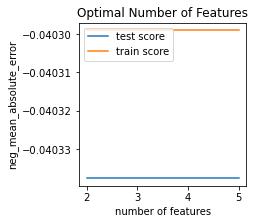

mean_squared_error :  41.83290205821422
mean_absolute_error :  5.324125349297054
mean_absolute_percentage_error :  0.04290189371422062
Accuracy of the Model is :  95.70981062857794



        Type        Model_Object mean_squared_error mean_absolute_error  \
0       Base  LinearRegression()          27.194717             3.97806   
1  Optimized             Ridge()          27.282366            4.148936   
2  Optimized             Lasso()          41.832902            5.324125   
3  Optimized        ElasticNet()          41.832902            5.324125   

  mean_absolute_percentage_error  acc   Accuracy  
0                       0.031661  NaN  96.833858  
1                       0.033182  NaN  96.681823  
2                       0.042902  NaN  95.709811  
3                       0.042902  NaN  95.709811  


C:\Users\SUDIPTO DAS\AppData\Local\Temp\ipykernel_31740\1907801009.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_info = df_model_info.append(dict_model_info, ignore_index=True, verify_integrity=False, sort=None)
C:\Users\SUDIPTO DAS\AppData\Local\Temp\ipykernel_31740\1907801009.py:31: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df_model_info = df_model_info.append(dict_model_info, ignore_index=True, verify_integrity=False, sort=None)


In [30]:
mod_df()  #--- re-initializing the model info df


C2_X_train,C2_X_test,C2_y_train,C2_y_test = train_test_split(df_features,
                                                 df_target,
                                                 test_size=0.9,
                                                 random_state=100
)


print('Case 2 Base model\n\n')
C2_bs_model = build_base_model(C2_X_train, C2_y_train, C2_X_test, C2_y_test)
print('C2_bs_model is : ', C2_bs_model)

search_best_model(C1_X_train, C1_y_train,C1_X_test,C1_y_test, params)

print(df_model_info)